## Import Library

Script di bawah digunakan untuk meng-import library yang diperlukan untuk menjalankan beberapa operasi dalam analisis citra dan pemrosesan data. 
- numpy : digunakan untuk manipulasi dan operasi array numerik efisien.
- matplotlib.pyplot : digunakan untuk membuat visualisasi grafik dan plot.
- os : digunakan untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori dalam dataset.
- from math import log : digunakan untuk meng-import fungsi log dari modul math. Fungsi ini digunakan dalam perhitungan GLCM (Gray Level Co-occurrence Matrix).
- cv2: menyediakan berbagai fungsi dan algoritma untuk pemrosesan citra.
- pandas : digunakan untuk manipulasi dan analisis data. DataFrame dari pandas sering digunakan untuk menyimpan dan menganalisis data tabular.
- ceil : fungsi ini digunakan untuk membulatkan bilangan ke atas menjadi bilangan integer terdekat.
- datasets : digunakan untuk meng-import modul datasets dari scikit-learn, yang menyediakan dataset bawaan yang umum digunakan.
- train_test_split : digunakan untuk membagi dataset menjadi subset pelatihan dan pengujian.
- svm : digunakan untuk meng-import modul svm dari scikit-learn, yang menyediakan algoritma Support Vector Machine (SVM) untuk klasifikasi dan regresi.
- accuracy_score : digunakan untuk menghitung akurasi dari model klasifikasi.
- classification_report : digunakan untuk menghasilkan laporan klasifikasi yang berisi metrik evaluasi seperti presisi, recall, dan f1-score.
- StandardScaler : digunakan untuk meng-importmelakukan penskalaan fitur dengan menghapus rata-rata dan mengubah varians fitur menjadi satu.
- PCA : digunakan untuk melakukan analisis komponen utama (PCA) yang mengurangi dimensi data dengan memproyeksikannya ke ruang fitur yang lebih rendah.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import os #untuk import dataset
from math import log #rumus glcm
import cv2 
import pandas as pd #untuk nampilin data frame
from math import ceil
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Menampilkan Gambar

Script di bawah bertujuan untuk menampilkan sejumlah gambar dalam bentuk grid dengan judul yang sesuai dengan parameter images berisi gambar-gambar yang akan ditampilkan, titles berisi judul untuk setiap gambar, row menentukan jumlah baris dalam grid, dan col menentukan jumlah kolom dalam grid.

In [71]:
def showImage(images, titles, row, col):
    plt.figure(figsize=(10,10)) #Membuat objek gambar baru dengan ukuran 10x10 inci 
    for i in range(row): #Melakukan perulangan sebanyak row kali untuk mengatur baris gambar dalam grid.
        for j in range (col): #Melakukan perulangan sebanyak col kali untuk mengatur kolom gambar dalam grid.
            plt.subplot(row,col,i*col+(j+1)) #Membuat subplot dalam grid dengan posisi yang sesuai berdasarkan indeks i dan j. Rumus i*col+(j+1) digunakan untuk menghitung nomor subplot secara berurutan.
            plt.grid(color="none") #Menonaktifkan garis grid pada subplot.
            plt.imshow(images[i*col+j],'gray') #igunakan untuk memilih gambar yang akan ditampilkan berdasarkan indeks i dan j. 'gray' mengindikasikan bahwa gambar ditampilkan dalam skala abu-abu.
            plt.title(titles[i*col+j]) #Menampilkan judul untuk setiap gambar dalam subplot. Judul gambar dipilih berdasarkan indeks i dan j dengan menggunakan titles[i*col+j].
    plt.tight_layout() #Mengatur tata letak subplot agar terlihat rapi dan sesuai.
    plt.show() #Menampilkan grid gambar yang telah dibuat.

## FILTERING

Script di bawah bertujuan untuk mengurutkan elemen-elemen dalam array.Fungsi ini menerima array sebagai masukan dan mengembalikan array yang sudah terurut. Fungsi sorting() ini mengimplementasikan algoritma pengurutan dengan pendekatan selection sort. Iterasi dilakukan pada setiap elemen array, dan pada setiap iterasi, elemen terkecil dalam subarray yang belum diurutkan dipilih dan ditukar dengan elemen pada posisi saat ini. Seiring dengan perulangan, elemen-elemen terkecil secara bertahap "maju" ke bagian awal array, sehingga pada akhirnya seluruh array terurut dari yang terkecil hingga terbesar.

In [72]:
def sorting(arr): #Mendefinisikan fungsi sorting() dengan satu parameter masukan yaitu arr yang merupakan array yang akan diurutkan.
    for i in range(len(arr)): #Melakukan perulangan sebanyak panjang array (len(arr)) kali untuk mengiterasi setiap elemen dalam array.
        swap = i + np.argmin(arr[i:]) #Menghitung indeks elemen terkecil dalam subarray yang dimulai dari indeks i hingga akhir array menggunakan fungsi np.argmin(). Nilai i ditambahkan untuk mengkoreksi indeks relatif terhadap subarray. Hasilnya disimpan dalam variabel swap.
        (arr[i], arr[swap]) = (arr[swap], arr[i]) #Melakukan pertukaran (swap) elemen di indeks i dengan elemen di indeks swap menggunakan teknik pertukaran nilai dalam Python.
    return arr #Mengembalikan array yang telah diurutkan setelah proses pengurutan selesai.

Script di bawah bertujuan untuk mengubah array dua dimensi menjadi array satu dimensi. 

In [73]:
def flatArray(arr): #Mendefinisikan fungsi flatArray() dengan satu parameter masukan yaitu arr yang merupakan array dua dimensi yang akan diubah menjadi array satu dimensi.
    row, col = arr.shape #Mengambil dimensi baris (row) dan kolom (col) dari array arr menggunakan atribut shape dari numpy array.
    flat=[] #Membuat list kosong dengan nama flat yang akan digunakan untuk menyimpan elemen-elemen array satu dimensi.
    for i in range (row): #Melakukan perulangan sebanyak jumlah baris (row) dalam array.
        for j in range (col): #Melakukan perulangan sebanyak jumlah kolom (col) dalam array.
            flat.append(arr[i][j]) #Menambahkan elemen pada indeks (i, j) dari array dua dimensi arr ke dalam list flat. Ini akan mengubah array dua dimensi menjadi satu dimensi dengan cara mengambil elemen-elemen secara berurutan.
    return flat #Mengembalikan list flat yang berisi elemen-elemen array satu dimensi setelah proses konversi selesai.

Script di bawah bertujuan untuk menerapkan filter median pada citra. Filter median digunakan untuk menghaluskan citra dengan menggantikan nilai piksel dengan nilai median dari piksel-piksel yang berada dalam jendela (window) tertentu. Fungsi median() ini menerapkan filter median pada citra dengan menggunakan jendela berukuran windowHeight x windowWidth. Pada setiap piksel citra, fungsi ini akan membentuk jendela di sekitar piksel tersebut, mengurutkan elemen-elemen dalam jendela, dan menggantikan nilai piksel dengan nilai median dari jendela. Hal ini digunakan untuk mengurangi derau atau noise pada citra dan menghasilkan citra yang lebih halus.

In [74]:
def median(image,windowHeight,windowWidth):
    pad = np.pad(image,(windowHeight,windowWidth),mode='edge')
    median = np.zeros(image.shape, dtype=np.uint8)
    for i in range(windowHeight,len(pad)-windowHeight):
        for j in range(windowWidth,len(pad)-windowWidth):
            window = flatArray(pad[i-windowHeight:i,j-windowWidth:j])
            window = sorting(window)
            median[i-windowHeight,j-windowWidth] = window[ceil(len(window)/2)]
    return median

## OPERASI MORFOLOGI -> EROSI

Script di bawah merupakan pengimplementasian fungsi erosi menggunakan operasi morfologi pada citra.

In [75]:
# Fungsi ini bertujuan untuk memeriksa kesesuaian nilai piksel pada jendela dengan SE. Jika ada setidaknya satu posisi pada SE yang bernilai 1 dan piksel yang sesuai pada 
# jendela bernilai 0, maka fungsi akan mengembalikan 0. Jika semua posisi pada SE yang bernilai 1 memiliki piksel yang sesuai pada jendela bernilai 1, maka fungsi akan 
# mengembalikan 1.
def fit(window,SE): 
    for i in range(len(SE)):
      for j in range(len(SE)):
        if(SE[i][j]==1 and window[i][j]==0): 
          return 0
    return 1

# Fungsi ini akan menghasilkan citra hasil erosi yang merupakan proses penghilangan piksel berdasarkan Structuring Element.
# fungsi erosi() ini memindai citra dengan jendela yang sesuai dengan ukuran SE, dan memeriksa apakah nilai piksel pada jendela sesuai dengan SE menggunakan fungsi `fit
def erosi(image,SE):
    erosi = np.zeros(image.shape, dtype=np.uint8)
    row, col = image.shape
    # melakukan perulangan pada window center image
    for i in range(row-len(SE)):
        for j in range(col-len(SE)):
            window = image[i:i+len(SE),j:j+len(SE)]
            # mengambil nilai pada fungsi fit, jika fit maka bernilai 1 jika tidak maka 0
            erosi[i][j] = fit(window,SE)
    return erosi

Script di bawah berfungsi untuk mengonversi citra menjadi citra biner. Dengan menggunakan fungsi convertBinary(), citra awal dapat diubah menjadi citra biner, di mana piksel-pikselnya hanya memiliki dua nilai yaitu 0 (hitam) atau 255 (putih). Proses ini biasanya digunakan dalam analisis citra untuk memisahkan objek dari latar belakang dengan cara yang lebih sederhana dan terstandarisasi.

In [76]:
def convertBinary(image):
    ret, binary = cv2.threshold(image,30,255,cv2.THRESH_BINARY)
    return binary

Script di bawah berfungsi untuk mendapatkan objek dari citra menggunakan proses thresholding. Dengan menggunakan fungsi getObject(), citra awal dapat diproses dengan proses thresholding untuk memisahkan objek dari latar belakang. Hasilnya adalah citra biner di mana objek diwakili oleh piksel dengan nilai 0 (hitam) dan latar belakang diwakili oleh piksel dengan nilai 255 (putih).

In [77]:
def getObject(image): 
    # untuk melakukan proses thresholding pada citra. Proses thresholding dilakukan dengan menggunakan ambang batas 118. Piksel dengan intensitas di atas ambang batas akan 
    # diberi nilai maksimum (255) dan piksel dengan intensitas di bawah ambang batas akan diberi nilai nol (0). Hasil dari proses ini disimpan dalam variabel bovine.
    ret,bovine = cv2.threshold(image,118,255,cv2.THRESH_BINARY)
    bovine-=255
    return bovine

Script di bawah merupakan pendefinisian SE (Structuring Element) dalam bentuk matriks. Dengan menggunakan matriks SE ini, dapat diterapkan operasi morfologi pada citra dengan memanfaatkan pola struktural yang ditentukan oleh matriks SE.

In [78]:
SE =  [[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]]

## SEGMENTASI

Script di bawah bertujuan untuk melakukan segmentasi pada citra dengan menggunakan metode operasi morfologi dan masking. Citra utama dapat diolah dan dipisahkan objeknya berdasarkan proses erosi, median filtering, dan masking. Hasilnya adalah citra yang hanya menampilkan objek yang tersegmentasi dari citra utama.

In [79]:
def segmentation(mainImage, grayImage):
    object=getObject(grayImage)
    erode = erosi(object, SE)
    medObject = median(erode, 4, 4) 
    maskObject = cv2.bitwise_and(mainImage, mainImage, mask=medObject) #buat maskingnya
    return maskObject

Script di bawah bertujuan untuk menggambar kontur objek yang telah diproses pada citra utama. Dengan menggunakan fungsi drawObject(), citra utama dapat digambar dengan kontur objek yang telah diproses sebelumnya. Hal ini membantu dalam visualisasi objek yang telah diidentifikasi pada citra utama.

In [80]:
def drawObject(mainImage, object): #buat drawnya, ini juga kayanya buat draw objectnya
    grayObject = cv2.cvtColor(object, cv2.COLOR_RGB2GRAY)
    binaryObject = convertBinary(grayObject)
    contours, hierarchy = cv2.findContours(binaryObject, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    objectDraw = cv2.drawContours(mainImage, contours, -1, (0,255,0), 2)
    return objectDraw

## MENGAMBIL DATASET

Script di bawah digunakan untuk melakukan beberapa hal terkait dengan pembacaan dataset citra dan pengolahan citra. 

In [81]:
dataset_dir = "dataset/"
images = []
labels = []
names  = []
amritmahal = 1 #nandain buat mulai dari 1
gir = 1 #nandain buat mulai dari 1
mehsana = 1 #nandain buat mulai dari 1
for sub_folder in os.listdir(dataset_dir): 
    sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img = cv2.imread(os.path.join(dataset_dir, sub_folder, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (255,255))
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        maskObject = segmentation(img, gray)
        draw = drawObject(img, maskObject)
        if (sub_folder == 'Amritmahal'): 
            plt.imsave("hasil dataset/mask_bovine/Mask-Amritmahal-"+str(amritmahal)+".png", maskObject)
            plt.imsave("hasil dataset/draw_bovine/Draw-Amritmahal-"+str(amritmahal)+".png", draw)
            amritmahal+=1
        elif(sub_folder == 'Gir'): 
            plt.imsave("hasil dataset/mask_bovine/Mask-Gir-"+str(gir)+".png", maskObject)
            plt.imsave("hasil dataset/draw_bovine/Draw-Gir-"+str(gir)+".png", draw)
            gir+=1
        else:
            plt.imsave("hasil dataset/mask_bovine/Mask-Mehsana-"+str(mehsana)+".png", ma skObject)
            plt.imsave("hasil dataset/draw_bovine/Draw-Mehsana-"+str(mehsana)+".png", draw)
            mehsana+=1
        grayObject = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        images.append(grayObject)
        labels.append(sub_folder)
        names.append(filename)
images = np.array(images)
labels = np.array(labels)
names = np.array(names)

## PLOTTING GAMBAR

Script di bawah berfungsi untuk membaca citra dengan nama file "1.jpg" dari direktori "dataset/Amritmahal". Citra tersebut dibaca dalam mode warna BGR menggunakan fungsi cv2.imread() dari library OpenCV. Hasilnya akan disimpan dalam variabel imgBGR yang dapat digunakan untuk proses selanjutnya.

In [82]:
imgBGR = cv2.imread('dataset/Amritmahal/1.png')

Script di bawah berfungsi mengubah mode warna citra dari BGR menjadi RGB menggunakan fungsi cv2.cvtColor() dari library OpenCV.

In [83]:
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

Script di bawah bertujuan untuk meresize citra yang telah diubah ke mode warna RGB dengan menggunakan fungsi cv2.resize() dari library OpenCV. Citra diubah ukurannya menjadi 255x255 piksel.

In [84]:
img = cv2.resize(imgRGB, (255,255))

Script di bawah bertujuan untuk mengubah citra dengan mode warna RGB menjadi citra grayscale menggunakan fungsi cv2.cvtColor() dari library OpenCV.

In [85]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

Script di bawah berfungsi untuk menginisialisasi variabel object dengan memanggil fungsi getObject() dan memberikan argumen citra grayscale gray ke dalamnya.

In [86]:
object=getObject(gray)

Script di bawah berfungsi untuk menginisialisasi variabel erode dengan memanggil fungsi erosi() dan memberikan argumen citra object serta struktur elemen SE ke dalamnya.

In [87]:
erode = erosi(object, SE)

Script di bawah berfungsi untuk menginisialisasi variabel medObject dengan memanggil fungsi median() dan memberikan argumen citra erode, serta ukuran jendela (window size) 4x4 ke dalamnya.

In [88]:
medObject = median(erode, 4, 4)

Script di bawah berfungsi untuk menginisialisasi variabel maskObject dengan menggunakan fungsi cv2.bitwise_and() untuk melakukan operasi bitwise AND antara citra img dan medObject, dengan menggunakan medObject sebagai mask. Operasi bitwise AND pada citra dilakukan dengan membandingkan piksel-piksel dari kedua citra input dan menghasilkan citra output di mana hanya piksel-piksel yang memiliki nilai yang sama (non-zero) pada kedua citra yang dipertahankan, sedangkan piksel-piksel yang memiliki nilai yang berbeda (zero) akan menjadi nol pada citra output.

In [89]:
maskObject = cv2.bitwise_and(img, img, mask=medObject)

Script di bawah berfungsi untuk menginisialisasi variabel grayObject dengan menggunakan fungsi cv2.cvtColor() untuk mengubah citra maskObject dari mode warna RGB menjadi citra grayscale.

In [90]:
grayObject = cv2.cvtColor(maskObject, cv2.COLOR_RGB2GRAY)

Script di bawah berfungsi untuk menginisialisasi variabel binaryObject dengan menggunakan fungsi convertBinary() untuk mengonversi citra grayObject menjadi citra biner. Fungsi convertBinary() mengambil citra grayObject sebagai argumen dan melakukan proses thresholding untuk menghasilkan citra biner. Pada kode tersebut, terdapat pemanggilan convertBinary(grayObject), yang berarti citra grayObject akan dijadikan input untuk fungsi convertBinary().

In [91]:
binaryObject = convertBinary(grayObject)

Pada dua baris script di bawah, dilakukan proses pencarian kontur pada citra biner binaryObject menggunakan fungsi cv2.findContours(). Kontur adalah tepi atau garis lengkung yang membentuk batas objek dalam citra.

In [92]:
contours, hierarchy = cv2.findContours(binaryObject, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
objectDraw = cv2.drawContours(img, contours, -1, (0,255,0), 2)

Pada script di bawah dilakukan beberapa proses pada citra imgRGB untuk menghasilkan beberapa citra yang berbeda. Kemudian, citra-citra tersebut disimpan dalam sebuah list hasilimage dan judul-judulnya disimpan dalam list titles. Setelah itu, fungsi showImage() dipanggil untuk menampilkan citra-citra tersebut dalam bentuk grid dengan 4 baris dan 3 kolom. Script di bawah menunjukkan proses transformasi dan pemrosesan citra yang dilakukan sebelum ditampilkan.

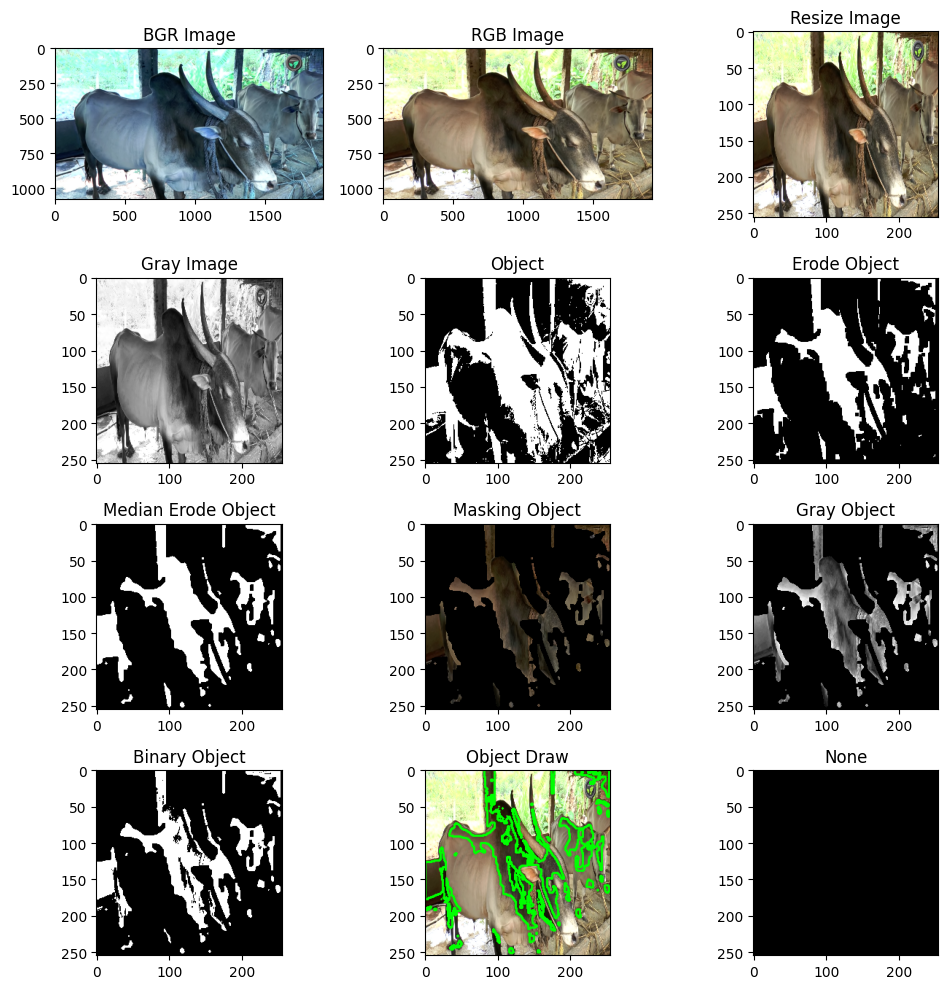

In [93]:
none = np.zeros(img.shape)
img = cv2.resize(imgRGB, (255,255))
titles = ['BGR Image','RGB Image', 'Resize Image',
    'Gray Image', 'Object', 'Erode Object',
    'Median Erode Object', 'Masking Object', 'Gray Object',
    'Binary Object', 'Object Draw', 'None']
hasilimage = [imgBGR,imgRGB, img,
    gray, object, erode,
    medObject, maskObject, grayObject,
    binaryObject, objectDraw, none]
showImage(hasilimage, titles, 4, 3)

## GLCM

Fungsi transpose(matrix) pada script di bawah digunakan untuk melakukan operasi transpose pada sebuah matriks. Operasi transpose mengubah baris menjadi kolom dan sebaliknya, sehingga elemen-elemen yang awalnya berada pada baris tertentu akan berpindah posisi menjadi kolom pada posisi yang sama.

In [94]:
def transpose(matrix):
    matrix_transpose = []
    row,col = matrix.shape
    for i in range(row):
        mRow = []
        for j in range(col):
            mRow.append(matrix[j][i])
        matrix_transpose.append(mRow)
    return matrix_transpose

Script di bawah bertujuan untuk menghitung jumlah seluruh elemen dalam sebuah matriks image. Dengan menggunakan fungsi dataSum(image), kita dapat menghitung jumlah seluruh elemen dalam matriks image dan mendapatkan hasilnya.

In [95]:
def dataSum(image):
    result = 0
    for i in range (len(image)):
        for j in range(len(image)):
            result+=image[i,j]
    return result

Script di bawah bertujuan untuk melakukan normalisasi terhadap nilai-nilai dalam sebuah matriks image. Normalisasi dilakukan dengan membagi setiap elemen dalam matriks dengan jumlah seluruh elemen matriks tersebut. Dengan menggunakan fungsi normalization(image), kita dapat melakukan normalisasi terhadap matriks image dan mendapatkan matriks yang telah dinormalisasi.

In [96]:
def normalization(image):
    row, col = image.shape
    n = dataSum(image)
    for i in range(row):
        for j in range(col):
            image[i,j]/=n
    return image

Script di bawah digunakan untuk menghitung matriks GLCM (Gray Level Co-occurrence Matrix) dari sebuah citra grayscale (image) dengan ukuran matriks dimention dan arah degree. Dengan menggunakan fungsi cooccurance(image, dimention, degree), kita dapat menghitung matriks GLCM dari citra grayscale dan mendapatkan representasi statistik dari hubungan antara piksel-piksel dalam citra tersebut.

In [97]:
def cooccurance (image, dimention, degree):
    row, col = image.shape
    matrixCo = np.zeros([dimention+1,dimention+1])
    if(degree == 0):
        for i in range(row):
            for j in range(col):
                if(j+1 < col):
                    matrixCo[image[i,j], image[i,j+1]] += 1
    elif (degree == 45):
        for i in range(row):
            for j in range(col):
                if(i-1 >= 0 and j+1 < col):
                    matrixCo[image[i,j], image[i-1,j+1]] += 1
    elif (degree == 90):
        for i in range(row):
            for j in range(col):
                if(i+1 < row and j+1 < col):
                    matrixCo[image[i,j], image[i+1,j]] += 1
    elif (degree == 135):
        for i in range(row):
            for j in range(col):
                if(i+1 < row and j+1 < col):
                    matrixCo[image[i,j], image[i+1,j+1]] += 1
    trans = transpose(matrixCo)
    sumMatrix = matrixCo+trans
    glcm = normalization(sumMatrix)
    return glcm

Fungsi-fungsi tersebut (mean, tao, extraction) terkait dengan ekstraksi fitur dari matriks GLCM (Gray Level Co-occurrence Matrix) yang direpresentasikan oleh citra image. Fungsi-fungsi ini menghitung sejumlah statistik dan fitur berdasarkan matriks GLCM.

In [98]:
def mean(image):
    meanX=meanY= 0
    for i in range (len(image)):
        for j in range(len(image)):
            meanX += i * image[i,j]
            meanY += j * image[i,j]
    return meanX, meanY
def tao(image):
    taoX=taoY=0
    meanX,meanY= mean(image)
    for i in range (len(image)):
        for j in range(len(image)):
            taoX += pow((i-meanX),2)*image[i,j]
            taoY += pow((j-meanY),2)*image[i,j]
    return taoX, taoY
def extraction(image):
    energy=homogenity=entropy=contrast=disimilarity=correlation=ASM=0
    meanX, meanY = mean(image)
    taoX, taoY = tao(image)
    for i in range (len(image)):
        for j in range (len(image)):
            contrast += image[i,j]*pow((i-j),2)
            disimilarity += image[i,j]*abs(i-j)
            # homogenity += image[i,j]/1+(pow((i-j),2))
            homogenity += image[i,j]/1+abs(i-j)
            if image[i,j] > 0:
                entropy += -(image[i,j] * log(image[i,j]))
            ASM += pow(image[i,j],2)
            correlation+=((i-meanX)*(j-meanY)*image[i,j])/pow((taoX*taoY),1/2)
    energy = pow(ASM, 1/2)
    return contrast,disimilarity,homogenity,entropy,ASM,energy,correlation

Fungsi getGLCM(images) menghasilkan matriks GLCM (Gray Level Co-occurrence Matrix) untuk setiap citra dalam daftar images. Fungsi ini melakukan ekstraksi GLCM dengan menggunakan fungsi cooccurance untuk empat arah sudut (0 derajat, 45 derajat, 90 derajat, dan 135 derajat).

In [99]:
def getGLCM(images):
    glcmImage = []
    for i in range(len(images)):
        glcm = []
        max = images[i].max()
        glcm.append(cooccurance(images[i],max,0))
        glcm.append(cooccurance(images[i],max,45))
        glcm.append(cooccurance(images[i],max,90))
        glcm.append(cooccurance(images[i],max,135))
        glcmImage.append(glcm)
    return glcmImage

Script di bawah membuat sebuah csv (comma-separated values) yang berisi data ekstraksi fitur GLCM dari setiap citra dalam daftar images. Setiap baris dalam csv akan berisi informasi tentang satu citra beserta fitur-fitur GLCM yang diekstraksi.Setelah selesai mengiterasi semua citra, csv akan berisi data ekstraksi fitur GLCM dari setiap citra dalam format yang sesuai untuk disimpan dalam file CSV.

In [100]:
csv = []
index = 0
for i in getGLCM(images):
    extract = []
    extract.append(names[index])
    extract.append(labels[index])
    index+=1
    for img in i:
        contrast,disimilarity,homogenity,entropy,ASM,energy,correlation = extraction(img)
        extract.append(contrast)
        extract.append(disimilarity)
        extract.append(homogenity)
        extract.append(entropy)
        extract.append(ASM)
        extract.append(energy)
        extract.append(correlation)
    csv.append(extract)

Script di bawah menggunakan library Pandas untuk membuat sebuah DataFrame dari data yang tersimpan dalam csv. DataFrame ini akan memiliki kolom-kolom yang sesuai dengan header yang diberikan. Setelah kode di atas dieksekusi, DataFrame df akan berisi data ekstraksi fitur GLCM yang telah disusun dalam format tabel dengan kolom-kolom yang sesuai.

In [101]:
header = ['Name','Label','Contrast0','Dissimilarity0','Homogenity0','Entropy0','ASM0','Energy0','Correlation0'
           ,'Contrast45','Dissimilarity45','Homogenity45','Entropy45','ASM45','Energy45','Correlation45'
           ,'Contrast90','Dissimilarity90','Homogenity90','Entropy90','ASM90','Energy90','Correlation90'
           ,'Contrast135','Dissimilarity135','Homogenity135','Entropy135','ASM135','Energy135','Correlation135']
df = pd.DataFrame(csv, columns=header)

Script di bawah akan menyimpan DataFrame df ke dalam file CSV dengan nama "result.csv". Fungsi to_csv() digunakan untuk menyimpan DataFrame ke dalam file CSV. Argument r'result.csv' menentukan nama dan lokasi file tujuan, sedangkan index=False digunakan untuk menghilangkan kolom indeks yang biasanya ditambahkan oleh default saat menyimpan ke file CSV.

In [102]:
df.to_csv(r'result.csv', index=False)

Script di bawah adalah variabel yang berisi DataFrame yang telah dibuat sebelumnya. Jika Anda mencetak df setelah menjalankan kode df.to_csv(r'result.csv', index=False), maka hasilnya akan menampilkan isi dari DataFrame tersebut. DataFrame ini berisi data yang diambil dari gambar-gambar dalam dataset, serta ekstraksi fitur GLCM yang telah dilakukan. Setiap baris dalam DataFrame mewakili satu gambar, dan setiap kolom mewakili fitur-fitur GLCM yang diekstraksi.

In [103]:
df

,Name,Label,Contrast0,Dissimilarity0,Homogenity0,Entropy0,ASM0,Energy0,Correlation0,Contrast45,...,ASM90,Energy90,Correlation90,Contrast135,Dissimilarity135,Homogenity135,Entropy135,ASM135,Energy135,Correlation135
0,1.png,Amritmahal,1183.977891,17.591663,5.592321e+06,8.247233,0.020094,0.141752,0.854661,1427.915773,...,0.024094,0.155222,0.923673,1274.781000,18.623830,5.592321e+06,8.307433,0.019381,0.139214,0.843445
1,10.png,Amritmahal,734.547707,11.749004,5.592321e+06,6.876981,0.038486,0.196179,0.827671,977.521220,...,0.036770,0.191755,0.839066,998.846364,14.994761,5.592321e+06,7.035479,0.031891,0.178580,0.764044
2,100.png,Amritmahal,271.867531,4.674232,5.592321e+06,4.450268,0.246896,0.496887,0.947316,385.278846,...,0.248366,0.498363,0.973833,325.855850,5.421012,5.592321e+06,4.550487,0.241786,0.491717,0.936870
3,11.png,Amritmahal,1030.108152,15.468782,5.592321e+06,8.485920,0.012070,0.109865,0.883745,1218.410642,...,0.014448,0.120199,0.934474,1127.654520,16.571347,5.592321e+06,8.552660,0.011033,0.105038,0.872643
4,12.png,Amritmahal,470.818280,13.430415,4.493679e+06,8.404357,0.005632,0.075045,0.884404,651.117800,...,0.005068,0.071187,0.900724,611.532659,15.870683,4.493679e+06,8.603483,0.004290,0.065501,0.849328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,95.png,Mehsana,458.482291,9.498255,5.334253e+06,8.168757,0.007627,0.087334,0.922139,593.355400,...,0.009168,0.095752,0.945227,584.299972,11.997628,5.334253e+06,8.417641,0.006966,0.083463,0.901081
296,96.png,Mehsana,1033.593654,13.565586,5.271001e+06,6.628781,0.078929,0.280944,0.869209,1420.321331,...,0.079029,0.281121,0.877590,1356.500574,17.451314,5.271001e+06,6.805918,0.068979,0.262639,0.827943
297,97.png,Mehsana,333.257141,6.493299,5.592321e+06,5.166868,0.190518,0.436484,0.965390,572.982965,...,0.185880,0.431137,0.954981,641.009734,10.799647,5.592321e+06,5.447287,0.182649,0.427374,0.933684
298,98.png,Mehsana,157.969446,6.271962,5.592321e+06,7.893339,0.006296,0.079349,0.967134,208.739599,...,0.006773,0.082297,0.982430,182.028288,7.253565,5.592321e+06,8.049270,0.005828,0.076342,0.962053


Script di bawah menginisialisasi variabel y dan X dengan menggunakan DataFrame df. Dengan menginisialisasi y dan X seperti itu, kita dapat menggunakan y sebagai target atau label dalam pemodelan atau analisis, sedangkan X digunakan sebagai fitur atau atribut yang akan digunakan untuk melatih model atau melakukan analisis lebih lanjut.

In [104]:
y = df['Label']
X = df.drop(['Label', 'Name'], axis = 1)

Script di bawah melakukan penskalaan fitur menggunakan StandardScaler dari modul sklearn.preprocessing. Hasilnya, X_scaled akan berisi fitur-fitur yang telah diubah skala menjadi memiliki mean 0 dan standar deviasi 1, siap untuk digunakan dalam pemodelan atau analisis lanjutan yang memerlukan skala yang seragam pada fitur-fiturnya.

In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Script di bawah menggunakan analisis komponen utama (Principal Component Analysis/PCA) untuk mengurangi dimensi fitur. PCA digunakan untuk mengidentifikasi pola yang signifikan dalam data dan mengurangi dimensi fitur. Dalam konteks ini, X_pca berisi representasi fitur yang lebih padat dengan jumlah dimensi yang lebih kecil (4 komponen utama) daripada X_scaled, sehingga dapat digunakan untuk analisis atau pemodelan selanjutnya dengan overhead komputasi yang lebih rendah.

In [106]:
pca = PCA(n_components=4)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Script di bawah berfungsi untuk melakukan pembagian dataset menjadi data latih (train) dan data uji (test) menggunakan fungsi train_test_split() dari modul sklearn.model_selection. 

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25)

Script di bawah menggunakan model Support Vector Machine (SVM) untuk melakukan pelatihan dan prediksi pada data yang telah dibagi menjadi data latih (X_train, y_train) dan data uji (X_test). Dengan menggunakan model SVM yang telah dilatih, kita dapat memprediksi kelas target untuk data yang belum pernah dilihat sebelumnya (data uji) dan membandingkan hasil prediksi dengan nilai sebenarnya (y_test) untuk mengevaluasi performa model.

In [108]:
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Script di bawah digunakan untuk mencetak akurasi prediksi model dengan membandingkan nilai sebenarnya (y_test) dengan hasil prediksi (y_pred) menggunakan metode accuracy_score().

In [109]:
# reporting model accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100),'%')

Accuracy: 53 %


Script di bawah adalah variabel yang berisi hasil prediksi yang diperoleh dari model. Variabel ini berisi kelas-kelas prediksi untuk set data uji (X_test) berdasarkan model yang telah dilatih sebelumnya. Nilai y_pred merupakan hasil prediksi dari model SVM untuk setiap sampel pada set data uji. Nilai ini dapat berupa label kelas atau nilai numerik tergantung pada jenis masalah yang sedang diselesaikan.

In [110]:
y_pred

array(['Amritmahal', 'Gir', 'Gir', 'Mehsana', 'Mehsana', 'Amritmahal',
       'Gir', 'Mehsana', 'Mehsana', 'Mehsana', 'Amritmahal', 'Mehsana',
       'Amritmahal', 'Amritmahal', 'Mehsana', 'Gir', 'Mehsana', 'Mehsana',
       'Mehsana', 'Amritmahal', 'Mehsana', 'Amritmahal', 'Amritmahal',
       'Gir', 'Mehsana', 'Mehsana', 'Gir', 'Mehsana', 'Amritmahal',
       'Mehsana', 'Amritmahal', 'Amritmahal', 'Mehsana', 'Amritmahal',
       'Gir', 'Gir', 'Amritmahal', 'Amritmahal', 'Mehsana', 'Amritmahal',
       'Gir', 'Mehsana', 'Mehsana', 'Amritmahal', 'Gir', 'Amritmahal',
       'Mehsana', 'Amritmahal', 'Mehsana', 'Gir', 'Amritmahal', 'Gir',
       'Gir', 'Amritmahal', 'Mehsana', 'Gir', 'Amritmahal', 'Amritmahal',
       'Gir', 'Gir', 'Gir', 'Mehsana', 'Gir', 'Gir', 'Amritmahal', 'Gir',
       'Amritmahal', 'Mehsana', 'Mehsana', 'Amritmahal', 'Mehsana',
       'Amritmahal', 'Gir', 'Mehsana', 'Gir'], dtype=object)

Script di bawah adalah variabel yang berisi label kelas sebenarnya untuk set data uji (X_test). Variabel ini digunakan untuk membandingkan dengan hasil prediksi (y_pred) yang diperoleh dari model.

In [111]:
y_test

241       Mehsana
185           Gir
132           Gir
88     Amritmahal
18     Amritmahal
          ...    
240       Mehsana
42     Amritmahal
60     Amritmahal
149           Gir
103           Gir
Name: Label, Length: 75, dtype: object

Script di bawah berfungsi untuk memanggil fungsi classification_report dengan paramater yaitu y_test dan y_pred

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Amritmahal       0.58      0.52      0.55        29
         Gir       0.64      0.47      0.54        30
     Mehsana       0.41      0.69      0.51        16

    accuracy                           0.53        75
   macro avg       0.54      0.56      0.53        75
weighted avg       0.56      0.53      0.54        75

